<a href="https://colab.research.google.com/github/youseon-jang/Books/blob/main/neural_network%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist

#### 텐서플로우로 가져오기

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0      # 0 ~ 1 사이로 스케일 조정

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train[0]
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
from keras import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
    Input(shape = (28, 28, 1)),
    Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])


model.compile(optimizer = 'rmsprop',
              loss = 'categorical_sparse_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from keras import models
from keras import layers

network = Sequential()
network.add(Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(Dense(10, activation = 'softmax'))


model.compile(optimizer = 'rmsprop',
              loss = 'categorical_sparse_crossentropy',   # 이진 분류 : binary_crossentropy
              metrics = ['accuracy'])

#### keras로 가져오기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')

In [ ]:
print(len(train_images[0]))
train_images.shape

784


(60000, 784)

In [ ]:
train_labels.shape

(60000,)

#### 레이블을 범주형으로 인코딩
- categorical crossentropy를 손실함수로 쓸거면

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_sparse_crossentropy',   # 이진 분류 : binary_crossentropy
              metrics = ['accuracy'])

network.fit(train_images, train_labels,
            epochs = 5,     # 반복 횟수
            batch_size = 128)   # 관측치 묶음 개수

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3306 - accuracy: 0.9787
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2809 - accuracy: 0.9820
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.9837
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2537 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2399 - accuracy: 0.9861


In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',   # 이진 분류 : binary_crossentropy
              metrics = ['accuracy'])

network.fit(train_images, train_labels,
            epochs = 5,     # 반복 횟수
            batch_size = 128)   # 관측치 묶음 개수

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1823 - accuracy: 0.9886
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1919 - accuracy: 0.9886
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1693 - accuracy: 0.9897
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1650 - accuracy: 0.9903
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1511 - accuracy: 0.9912


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc : ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.8716 - accuracy: 0.9782
test_acc :  0.9782000184059143


가설 공간
- 공간의 크기는 두 가지로 결정됨
> - 레이어 개수
> - 레이어의 유닛 수

- 무조건 큰 게 좋다고 하기보다는 적절한 것을 선택해야 함
- 이를 알 수 있는 공식은 아직 없음


< 이미지 객체 탐지 >
객체 탐지 --> YOLO
이미지 세그멘테이션 --> 의학 쪽에서 많이 활용됨

pre-trained된 모델
- 생으로 하면 시간 너무 오래걸림
- 과제에 특화되게 fine tuning

# 이미지 분류 모델

### CNN(합성곱 신경망)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1))) ### (3, 3) 필터가 32개
model.add(layers.MaxPooling2D((2, 2)))    ### Pooling 세로 가로 방향의 공간을 줄이는 연산
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

- 28 X 28을 input으로 넣었는데 패딩 때문에 26 X 26으로 줄어듦

- 파라미터는 가중치를 의미함

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))  ## output은 64
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

- Conv 층을 사용하는 이용은 공간 정보를 저장하기 위해서임

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer = 'rmsprop',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels,
          epochs = 5,
          batch_size = 64)

Epoch 1/5
938/938 [==============================] - 6s 4ms/step - loss: 0.1766 - accuracy: 0.9436
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0480 - accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0202 - accuracy: 0.9937


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0240 - accuracy: 0.9933


- 가중치를 업데이트 하기 위해 에포크를 설정해서 훈련시킴
- 에포크 : 과대적합, 비용 증가

- 학습의 목적은 일반화임
> 따라서 과대적합은 중요함


In [ ]:
print(test_loss)
print(test_acc)

0.024031171575188637
0.9933000206947327


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

'3-2 dogs-vs-cats_original.zip'   cats_and_dogs.tar   drive/   sample_data/


In [ ]:
!unzip -qq "/content/dogs_vs_cats_original.zip"

unzip:  cannot find or open /content/dogs_vs_cats_original.zip, /content/dogs_vs_cats_original.zip.zip or /content/dogs_vs_cats_original.zip.ZIP.


# CNN 복습


In [ ]:
import gdown

url = "https://drive.google.com/uc?id=1ipzN9okFFT3oieklsrfr6iUHzjPAbT9i"

gdown.download(url, "cats_and_dogs.tar") 


Downloading...
From: https://drive.google.com/uc?id=1ipzN9okFFT3oieklsrfr6iUHzjPAbT9i
To: /content/cats_and_dogs.tar
100%|██████████| 94.0M/94.0M [00:00<00:00, 173MB/s]


'cats_and_dogs.tar'

In [ ]:
!tar -xvf cats_and_dogs.tar

cats_and_dogs/
cats_and_dogs/test/
cats_and_dogs/train/
cats_and_dogs/validation/
cats_and_dogs/test/cats/
cats_and_dogs/test/dogs/
cats_and_dogs/train/cats/
cats_and_dogs/train/dogs/
cats_and_dogs/validation/cats/
cats_and_dogs/validation/dogs/
cats_and_dogs/test/cats/cat.1500.jpg
cats_and_dogs/test/cats/cat.1501.jpg
cats_and_dogs/test/cats/cat.1502.jpg
cats_and_dogs/test/cats/cat.1503.jpg
cats_and_dogs/test/cats/cat.1504.jpg
cats_and_dogs/test/cats/cat.1505.jpg
cats_and_dogs/test/cats/cat.1506.jpg
cats_and_dogs/test/cats/cat.1507.jpg
cats_and_dogs/test/cats/cat.1508.jpg
cats_and_dogs/test/cats/cat.1509.jpg
cats_and_dogs/test/cats/cat.1510.jpg
cats_and_dogs/test/cats/cat.1511.jpg
cats_and_dogs/test/cats/cat.1512.jpg
cats_and_dogs/test/cats/cat.1513.jpg
cats_and_dogs/test/cats/cat.1514.jpg
cats_and_dogs/test/cats/cat.1515.jpg
cats_and_dogs/test/cats/cat.1516.jpg
cats_and_dogs/test/cats/cat.1517.jpg
cats_and_dogs/test/cats/cat.1518.jpg
cats_and_dogs/test/cats/cat.1519.jpg
cats_and_dogs/

In [ ]:
import keras
from keras import Model
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Input

inputs = Input(shape = (180, 180, 3))
x = Rescaling(1./255)(inputs)
x = Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)
x = Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)
x = Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)
x = Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)
x = Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = Flatten()(x)
outputs = Dense(1, activation = 'sigmoid')(x)

model = Model(inputs = inputs, outputs = outputs)

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory('cats_and_dogs/train',
                                             image_size = (180, 180),
                                             batch_size = 32)

validation_dataset = image_dataset_from_directory('cats_and_dogs/validation',
                                                  image_size = (180, 180),
                                                  batch_size = 32)

test_dataset = image_dataset_from_directory('cats_and_dogs/test',
                                            image_size = (180, 180),
                                            batch_size = 32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print('data batch size : ', data_batch.shape)
  print('labels batch size : ', labels_batch.shape)
  break

data batch size :  (32, 180, 180, 3)
labels batch size :  (32,)


In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'convnet_from_scratch.keras',
                                             save_best_only = True,
                                             monitor = 'val_loss')]

history = model.fit(train_dataset,
                    epochs = 30,
                    validation_data = validation_dataset,
                    callbacks = callbacks)

Epoch 1/30
63/63 [==============================] - 285s 5s/step - loss: 0.7648 - accuracy: 0.5365 - val_loss: 0.6866 - val_accuracy: 0.6330
Epoch 2/30
63/63 [==============================] - 259s 4s/step - loss: 0.7022 - accuracy: 0.5535 - val_loss: 0.6612 - val_accuracy: 0.6060
Epoch 3/30
63/63 [==============================] - 256s 4s/step - loss: 0.6692 - accuracy: 0.6170 - val_loss: 0.6385 - val_accuracy: 0.6410
Epoch 4/30
63/63 [==============================] - 213s 3s/step - loss: 0.6488 - accuracy: 0.6450 - val_loss: 0.6932 - val_accuracy: 0.6190
Epoch 5/30
63/63 [==============================] - 186s 3s/step - loss: 0.5867 - accuracy: 0.7025 - val_loss: 0.6331 - val_accuracy: 0.6310
Epoch 6/30
63/63 [==============================] - 195s 3s/step - loss: 0.5523 - accuracy: 0.7315 - val_loss: 0.6100 - val_accuracy: 0.6850
Epoch 7/30
63/63 [==============================] - 194s 3s/step - loss: 0.5132 - accuracy: 0.7515 - val_loss: 0.6469 - val_accuracy: 0.6720
Epoch 8/30
63

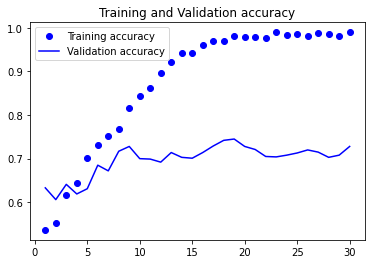

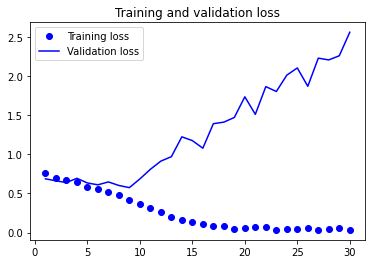

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

32/32 [==============================] - 28s 766ms/step - loss: 0.5817 - accuracy: 0.7270
테스트 정확도 : 0.727


### 데이터 증식 사용해서 다시 해보기

In [ ]:
from keras import Sequential
from keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    RandomZoom(0.2),
])

In [ ]:
plt.figure(figsize = (10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(mages)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
import keras
from keras import Model
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Input

inputs = Input(shape = (180, 180, 3))

x = data_augmentation(1./255)(x)
x = Rescaling(1./255)(inputs)
x = Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)
x = Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)
x = Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)
x = Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2)(x)
x = Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = Flatten()(x)
outputs = Dense(1, activation = 'sigmoid')(x)

model = Model(inputs = inputs, outputs = outputs)

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'convnet_from_scratch_with_augmentation.keras',
                                             save_best_only = True,
                                             monitor = 'val_loss')]

history = model.fit(train_datset,
                    epochs = 50,
                    validation_data = validation_dataset,
                    callbacks = callbacks)

In [ ]:

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.ef}')

아래 다양한 모델들도 사용해보기
https://greeksharifa.github.io/computer%20vision/2021/10/24/ImageNet-CNN-models/

- 참고 : https://warm-uk.tistory.com/44

# LeNet

In [ ]:
from keras import backend
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### LeNet 모델 만들기
class LeNet:
  @staticmethod
  def build(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(6, kernel_size = 5, padding = 'same', activation = 'relu', input_shape = input_shape))
    model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Conv2D(16, kernel_size = 5, padding = 'same', activation = 'relu'))
    model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(84, activation = 'relu'))
    model.add(Dense(2, activation = 'sigmoid'))
    return model

In [ ]:
model = LeNet.build(input_shape = (180, 180, 3), classes = 2)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 180, 180, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 90, 90, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 45, 45, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 32400)             0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

lenet_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'LeNet_from_scratch.keras',
                                             save_best_only = True,
                                             monitor = 'val_loss')]

history = model.fit(train_dataset,
                    epochs = 30,
                    validation_data = validation_dataset,
                    callbacks = lenet_callbacks)

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_model = keras.model.load_model('LeNet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

# AlexNet

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, ZeroPadding2D

model = Sequential()
model.add(Conv2D(96, (11, 11), input_shape = (180, 180, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (5, 5), activation = 'relu', padding = 'same'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(284, (3, 3), activation = 'relu', padding = 'same'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

alexnet_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'AlexNet_from_scratch.keras',
                                             save_best_only = True,
                                             monitor = 'val_loss')]

history = model.fit(train_dataset,
                    epochs = 30,
                    validation_data = validation_dataset,
                    callbacks = alexnet_callbacks)

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_model = keras.model.load_model('AlexNet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

# GoogleNet(Inception)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout,AveragePooling2D,Dense,Conv2D,MaxPooling2D,Activation,Concatenate,GlobalAveragePooling2D,Flatten
from tensorflow.keras import Input

def inception(x_in, x1_f,x3r_f,x3_f,x5r_f,x5_f,po):
    
    x1 = MaxPooling2D(pool_size=(3,3),strides=(1,1),padding = 'SAME')(x_in)
    x1 = Conv2D(filters= po,kernel_size=(1,1),padding="SAME")(x1)
    x1 = Activation('relu')(x1)

    x2 = Conv2D(filters=x5r_f,kernel_size=(1,1),padding="SAME")(x_in)
    x2 = Conv2D(filters=x5_f,kernel_size=(5,5),padding="SAME")(x2)
    x2 = Activation('relu')(x2)

    x3 = Conv2D(filters=x3r_f,kernel_size=(1,1),padding="SAME")(x_in)
    x3 = Conv2D(filters=x3_f,kernel_size=(3,3),padding="SAME")(x3)
    x3 = Activation('relu')(x3)

    x4 = Conv2D(filters=x1_f,kernel_size=(1,1),padding="SAME")(x_in)
    x4 = Activation('relu')(x4)

    out = Concatenate()([x1,x2,x3,x4])
    return out


In [ ]:
input_data = Input(shape=(180,180,3))
x = Conv2D(filters=64,kernel_size=(7,7),strides=(2,2),padding="SAME")(input_data)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="SAME")(x)
x = tf.keras.layers.LayerNormalization()(x)

x = Conv2D(filters=64,kernel_size=(1,1),strides=(1,1),padding="SAME")(x)
x = Conv2D(filters=192,kernel_size=(3,3),strides=(1,1),padding="SAME")(x)

x = tf.keras.layers.LayerNormalization()(x)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="SAME")(x)


x = inception(x,64,96,128,16,32,32)
x = inception(x,128,128,192,32,96,64)

x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="SAME")(x)
x = inception(x,192,96,208,16,48,64)

ax1 = AveragePooling2D(pool_size=(5,5),strides=(3,3))(x)
ax1 = Conv2D(filters=128,kernel_size=(1,1),padding="SAME")(ax1)
ax1 = Flatten()(ax1)
ax1 = Dense(1024,activation="relu")(ax1)
ax1 = Dropout(0.7)(ax1)
ax1 = Dense(1000,activation="softmax")(ax1)

x = inception(x,160,112,224,24,64,64)
x = inception(x,128,128,256,24,64,64)

x = inception(x,112,114,288,32,64,64)

ax2 = AveragePooling2D(pool_size=(5,5),strides=(3,3))(x)
ax2 = Conv2D(filters=128,kernel_size=(1,1),padding="SAME")(ax2)
ax2 = Flatten()(ax2)
ax2 = Dense(1024,activation="relu")(ax2)
ax2 = Dropout(0.7)(ax2)
ax2 = Dense(1000,activation="softmax")(ax2)

x = inception(x,256,160,320,32,128,128)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="SAME")(x)

x = inception(x,256,160,320,32,128,128)
x = inception(x,384,192,384,48,128,128)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)

outputs = Dense(1000,activation="softmax")(x)
googlenet = tf.keras.models.Model(input_data,[outputs,ax1,ax2],name = 'googlenet')
googlenet.summary()


# VGG

# ResNet

In [ ]:
def res_identity(x, filters):
    x_skip = x ------ 레지듀얼 블록을 추가하는 데 사용
    f1, f2 = filters

    x = Conv2D(f1, kernel_size=(1,1), strides=(1,1), padding='valid',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x) ------ ①
    x = Activation(activations.relu)(x) ------ 첫 번째 블록

    x = Conv2D(f1, kernel_size=(3,3), strides=(1,1), padding='same',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x) ------ 두 번째 블록

    x = Conv2D(f2, kernel_size=(1,1), strides=(1,1), padding='valid',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x) ------ 세 번째 블록

    x = Add()([x, x_skip]) ------ 숏컷
    x = Activation(activations.relu)(x)
    return x

In [ ]:
def res_conv(x, s, filters):
    x_skip = x
    f1, f2 = filters

    x = Conv2D(f1, kernel_size=(1,1), strides=(s,s), padding='valid',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x) ------ 첫 번째 블록

    x = Conv2D(f1, kernel_size=(3,3), strides=(1,1), padding='same',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x) ------ 두 번째 블록

    x = Conv2D(f2, kernel_size=(1,1), strides=(1,1), padding='valid',
               kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x) ------ 세 번째 블록

    x_skip = Conv2D(f2, kernel_size=(1,1), strides=(s,s), padding='valid',
                    kernel_regularizer=l2(0.001))(x_skip)
    x_skip = BatchNormalization()(x_skip) ------ 숏컷

    x = Add()([x, x_skip])
    x = Activation(activations.relu)(x)
    return x

CNN

완전 연결 네트워크의 문제점으로부터 시작

- 매개변수의 폭발적인 증가
- 공간 추론의 부족
 - 픽셀 사이의 근접성 개념이 완전 연결 계층에서는 손실됨
- 합성곱 계층은 입력 이미지가 커져도 튜닝해야 할 매개변수 개수에 영향을 주지 않음
- 또한 그 어떠한 이미지에도 그 차원 수와 상관없이 적용될 수 있음

CNN

완전 연결 네트워크의 문제점으로부터 시작

- 매개변수의 폭발적인 증가
- 공간 추론의 부족
 - 픽셀 사이의 근접성 개념이 완전 연결 계층에서는 손실됨
- 합성곱 계층은 입력 이미지가 커져도 튜닝해야 할 매개변수 개수에 영향을 주지 않음
- 또한 그 어떠한 이미지에도 그 차원 수와 상관없이 적용될 수 있음

https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4
컨볼루션 연산
- 필터 연산
 - 입력 데이터에 필터를 통한 어떠한 연산을 진행
 - 필터에 대응하는 원소끼리 곱하고 그 합을 구함
 - 연산이 완료된 결과 데이터를 특징 맵이라 부름
- 필터
 - 커널이라고도 하며 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념
 - 필터의 사이즈는 '거의 항상 홀수'
  - 짝수이면 패딩이 비대칭이 되어버림
  - 왼쪽, 오른쪽을 다르게 주어야함
  - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재
 - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정, 따라서 과적합을 방지할 수 있음

An example of convolution operation  
https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524

- 일반적으로 합성곱 연산을 한 후의 데이터 사이즈는 (n - f + 1) x (n - f + 1)

- 패딩과 스트라이드
 - 필터(커널) 사이즈와 함께 입력 이미지와 출력 이미지의 사이즈를 결정하기 위해 사용
 - 사용자가 결정할 수 있음
 - 패딩은 입력 데이터의 주변을 특정 값으로 채우는 기법. 주로 0으로 많이 채움
 - 출력 데이터의 크기 : (n + 2p - f +1) x (n + 2p -f + 1)
 - valid(패딩을 주지 않음) 와 same(패딩을 주어 입력 이미지와 연산 후의 이미지가 같게 함), 패딩의 크기는 (k-1)/2 (단, stride=1)
 - 스트라이드는 필터를 적용하는 간격을 의미

 https://kingnamji.tistory.com/24

 https://m.blog.naver.com/jevida/221841296542

LeNet-5 
- LeNet-5는 복잡하지 않은 망을 이용하여 (당시 기준)높은 성능을 보여주었을 뿐만 아니라 Convolutional layer와 pooling의 조합을 반복하는 현대적인 CNN 구조를 제안했다는 점에서 의미가 있는 모델 
- https://velog.io/@woojinn8/CNN-Network-1.-LeNet

Visual Geometry Group Net(VGGNet)
- 활성화 함수로 ReLU 사용, Dropout 적용
- 합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조
- 인위적으로 데이터셋을 늘림
 - 이미지 변환, 좌우 반전 등의 변환을 시도
- 몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블록과 3개의 완전 연결계층으로 구성
- 모든 합성곱과 최대 풀링 계층에 padding='SAME' 적용<br>
https://buomsoo-kim.github.io/keras/2018/05/02/Easy-deep-learning-with-Keras-8.md/ <br>
- 합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용
- 특성맵 깊이를 증가 시킴
- 척도 변경을 통한 데이터 보강(Data Augmentation)
- 3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐
- 11X11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음
- 이와 같이 합성곱 계층의 개수가 많아지면 매개변수 개수를 줄이고 비선형성을 증가시킴
- VGG-19 아키텍쳐는 VGG-16에 3개의 합성곱 계층을 추가

- LeNet-5, AlexNet, VGG-16, ResNet, Inception Network  
https://wooono.tistory.com/233

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_net = VGG16(include_top = True, weights = 'imagenet',
                input_tensor = None,
                input_shape = None,
                pooling = None,
                classes = 1000)

553467096/553467096 [==============================] - 24s 0us/step


In [ ]:
vgg_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

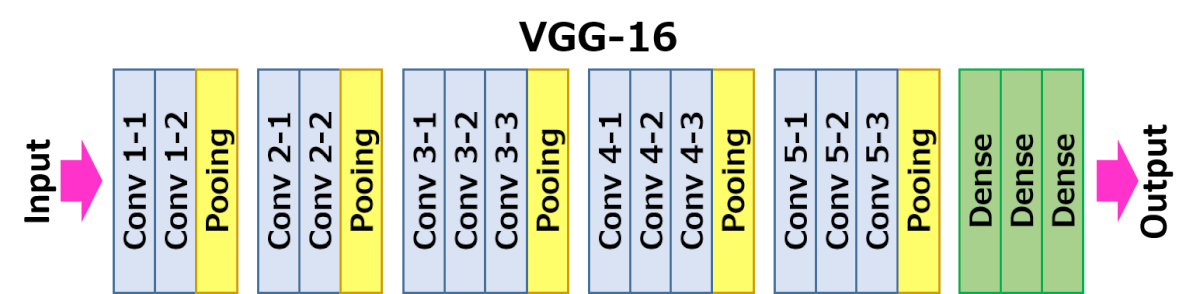




  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스

- VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

In [ ]:
from tensorflow.keras.applications import VGG19
vgg_net = VGG19(include_top = True, weights = 'imagenet',
                input_tensor = None,
                input_shape = None,
                pooling = None,
                classes = 1000)


### weights = 'imagenet' : imagenet 경진대회에서 썼던 vgg19의 가중치를 가져오기

In [ ]:
vgg_net.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Visual Geometry Group Net(VGGNet)
- 활성화 함수로 ReLU 사용, Dropout 적용
- 합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조
- 인위적으로 데이터셋을 늘림
 - 이미지 변환, 좌우 반전 등의 변환을 시도
- 몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블록과 3개의 완전 연결계층으로 구성
- 모든 합성곱과 최대 풀링 계층에 padding='SAME' 적용<br>
https://buomsoo-kim.github.io/keras/2018/05/02/Easy-deep-learning-with-Keras-8.md/ <br>
- 합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용
- 특성맵 깊이를 증가 시킴
- 척도 변경을 통한 데이터 보강(Data Augmentation)
- 3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐
- 11X11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음
- 이와 같이 합성곱 계층의 개수가 많아지면 매개변수 개수를 줄이고 비선형성을 증가시킴
- VGG-19 아키텍쳐는 VGG-16에 3개의 합성곱 계층을 추가

- LeNet-5, AlexNet, VGG-16, ResNet, Inception Network  
https://wooono.tistory.com/233
- VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

  <br>   

  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png%22%3E
  <center>VGG-16 아키텍쳐</center>

  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스
- VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

  <br>   

  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png%22%3E
  <center>VGG-16 아키텍쳐</center>

  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스
GoogLeNet, Inception 모듈
- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지
- 인셉션 블록이라는 개념을 도입하여 인셉션 네트워크라고도 불림
- Inception Module은 layer에 1x1 Convolution layer를 추가해 bottleneck layer를 구현함으로써, channel 수를 감소시키며, 연산량을 줄이는 구조입니다.
이것이 inception module의 기본 아이디어이며, Inception Network는 이러한 Inception Module의 집합입니다.

GoogLeNet, Inception 모듈
- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지
- 인셉션 블록이라는 개념을 도입하여 인셉션 네트워크라고도 불림
- Inception Module은 layer에 1x1 Convolution layer를 추가해 bottleneck layer를 구현함으로써, channel 수를 감소시키며, 연산량을 줄이는 구조입니다.
이것이 inception module의 기본 아이디어이며, Inception Network는 이러한 Inception Module의 집합입니다.

# GoogLeNet, Inception 모듈

- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지

- 인셉션 블록이라는 개념을 도입하여, **인셉션 네트워크(Inception Network)**라고도 불림



- 특징 
  
  - CNN 계산 용량을 최적화하는 것을 고려

  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과  
    해당 모듈을 하위 네트워크라고도 함

  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결

  - 모든 합성곱과 풀링 계층의 padding옵션은 "SAME"이며 `stride=1`,  
    활성화 함수는 `ReLU` 사용

- 기여

  - 규모가 큰 블록과 병목을 보편화

  - 병목 계층으로 1x1 합성곱 계층 사용

  - 완전 연결 계층 대신 풀링 계층 사용

  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png%22%3E

  <sub>[이미지 출처] https://norman3.github.io/papers/docs/google_inception.html%3C/sub%3E